In [1]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=75256f83f0f392d5dd7ba6b1895da7031019bdc6a9878b4fe6473145411cad85
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [89]:
import wikipedia
# import wikipediaapi 
import datetime
import pandas as pd
import numpy as np
from sklearn import feature_extraction
from sklearn import model_selection
import nltk
from nltk import tokenize
from nltk import word_tokenize, pos_tag
import string
from keras.preprocessing.text import Tokenizer
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [3]:
classes = ['sport', 'economy', 'politics', 'health', 'tourism', 
           'entertainment', 'culture', 'music', 'education', 
           'real estate', 'nutrition', 'science', 'history', 'technology'
          ]

In [4]:
def generate_data(classes, n):
    data = [];
    for i in classes:
#         topics = wikipedia.search(i, results = n)
#         for j in topics:
#         print(classes)
#         print("Class: ", i)
        for j in list(wikipedia.search(i,results = n)):
            wiki_wiki = wikipediaapi.Wikipedia('en')
            page_py = wiki_wiki.page(j)
            if(page_py.exists()):
#                 print("Class: ", i)
#                 print("Title: ", j)
#                     print("Section: ", page_py.sections[0].title)
#                     print("Text: ", page_py.text)
                for k in page_py.categories:
                    if i in k.lower(): 
#                         print("Class: ", i)
                        data.append((i, page_py.summary))
                        break
            else:
                continue
    return data

In [5]:
# data = generate_data(classes, 10)

In [6]:
# for i in classes:
#     c = 0
#     for j in range(0, len(data)):
#         if(data[j][0] == i):
#             c = c + 1
#     print("%s %d" %(i, c))

In [7]:
def create_data_csv_file(name, data):
    name = name + '.csv'
#         '_' + str(datetime.datetime.now()).replace(' ', '_').replace('.', '-').replace(':', '-') + 
#         '.csv'
    sep = '<>'
    cols = 'class' + sep + 'text\n'
    with open(name, 'w+', encoding='utf-8') as file:
        file.write(cols)
#         YELLOW,SMALL,STRETCH,ADULT,T
        for i in range(0, len(data)):
            line = data[i][0] + sep + data[i][1].replace('\n', ' ')

            file.write(line)
            file.write('\n')
    file.close()
            
#     print(text)

In [8]:
# create_data_csv_file('data_10', data)

In [9]:
df = pd.read_csv('data_10.csv', sep = '<>')
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,class,text
0,sport,Sport pertains to any form of competitive phys...
1,sport,Sport was an American sports magazine. Launche...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп..."
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...
4,sport,Sport diving is an underwater sport that uses ...
...,...,...
100,technology,"Fintech a portmanteau of ""financial technology..."
101,technology,TCL Technology (originally an abbreviation for...
102,technology,Space technology is technology for use in oute...
103,technology,A technology company (or tech company) is an e...


In [10]:
df['class'].value_counts()

sport            10
tourism           9
culture           9
education         9
real estate       9
nutrition         8
science           8
technology        8
health            7
music             7
politics          6
history           6
entertainment     5
economy           4
Name: class, dtype: int64

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
dict_class_index = {
    class_name: i for i, class_name in enumerate(df['class'].unique())
}

df['class num'] = df['class'].map(dict_class_index)

In [13]:
df

,class,text,class num
0,sport,Sport pertains to any form of competitive phys...,0
1,sport,Sport was an American sports magazine. Launche...,0
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...,0
4,sport,Sport diving is an underwater sport that uses ...,0
...,...,...,...
100,technology,"Fintech a portmanteau of ""financial technology...",13
101,technology,TCL Technology (originally an abbreviation for...,13
102,technology,Space technology is technology for use in oute...,13
103,technology,A technology company (or tech company) is an e...,13


In [14]:
dict_class_index

{'sport': 0,
 'economy': 1,
 'politics': 2,
 'health': 3,
 'tourism': 4,
 'entertainment': 5,
 'culture': 6,
 'music': 7,
 'education': 8,
 'real estate': 9,
 'nutrition': 10,
 'science': 11,
 'history': 12,
 'technology': 13}

In [15]:
!pip install advertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 309 kB 13.3 MB/s 
     |████████████████████████████████| 264 kB 62.6 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 251 kB 65.5 MB/s 
     |████████████████████████████████| 93 kB 1.0 MB/s 
     |████████████████████████████████| 4.0 MB 9.2 MB/s 
     |████████████████████████████████| 3.1 MB 63.2 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=0c9985077e99eb3defc007f6aeeb0599c0a648f180265688dea7a5efe94ef233
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher


In [16]:
import advertools as adv
stop_words = sorted(adv.stopwords['english'])
print(stop_words)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon

In [17]:
def clear_text(text):
    new_text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])).str.lower()
    new_text = new_text.replace(r'[^\w\s]+', '', regex=True)
    return new_text

In [18]:
new_text = clear_text(df['text'])

In [19]:
df['clear text'] = new_text
df

,class,text,class num,clear text
0,sport,Sport pertains to any form of competitive phys...,0,sport pertains form competitive physical activ...
1,sport,Sport was an American sports magazine. Launche...,0,sport american sports magazine launched septem...
2,sport,"Sport, Sport, Sport (Russian: Спорт, спорт, сп...",0,sport sport sport russian спорт спорт спорт 19...
3,sport,Sport Lisboa e Benfica (Portuguese pronunciat...,0,sport lisboa e benfica portuguese pronunciatio...
4,sport,Sport diving is an underwater sport that uses ...,0,sport diving underwater sport uses recreationa...
...,...,...,...,...
100,technology,"Fintech a portmanteau of ""financial technology...",13,fintech portmanteau financial technology refer...
101,technology,TCL Technology (originally an abbreviation for...,13,tcl technology originally abbreviation telepho...
102,technology,Space technology is technology for use in oute...,13,space technology technology use outer space tr...
103,technology,A technology company (or tech company) is an e...,13,a technology company or tech company electroni...


In [20]:
newest_text = []
for i in range(0, len(df)):
    newest_text.append(word_tokenize(df['clear text'][i]))

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
def my_lemmitezer(text):
    return pos_tag(word_tokenize(text))

In [24]:
tokenized_lemmitzed_text = []
for i in range(0, len(df)):
    tokenized_lemmitzed_text.append(my_lemmitezer(df['clear text'][i]))

In [25]:
df['tokenized lemmitzed text'] = tokenized_lemmitzed_text

In [26]:
stemmer = nltk.stem.PorterStemmer()

In [27]:
def my_stemmer(text):
    tokenized_stemmed_text = []
    tokens = word_tokenize(text)
    for token in tokens:
        tokenized_stemmed_text.append(stemmer.stem(token))
    return tokenized_stemmed_text

In [28]:
tokenized_stemmed_text = []
for i in range(0, len(df)):
    tokenized_stemmed_text.append(my_stemmer(df['clear text'][i]))

In [29]:
df['tokenized stemmed text'] = tokenized_stemmed_text
# df['tokenized stemmed text'] = df['tokenized stemmed text'].str.join(' ')

In [30]:
x = df['clear text']
x

0      sport pertains form competitive physical activ...
1      sport american sports magazine launched septem...
2      sport sport sport russian спорт спорт спорт 19...
3      sport lisboa e benfica portuguese pronunciatio...
4      sport diving underwater sport uses recreationa...
                             ...                        
100    fintech portmanteau financial technology refer...
101    tcl technology originally abbreviation telepho...
102    space technology technology use outer space tr...
103    a technology company or tech company electroni...
104    agricultural technology agrotechnology abbrevi...
Name: clear text, Length: 105, dtype: object

In [31]:
y = df['class num']
y

0       0
1       0
2       0
3       0
4       0
       ..
100    13
101    13
102    13
103    13
104    13
Name: class num, Length: 105, dtype: int64

In [32]:
x_tr, x_ft, y_tr, y_ft = model_selection.train_test_split(x, y, test_size=0.2, stratify=y)

In [33]:
x_tr

93     google chrome freeware web browser developed g...
4      sport diving underwater sport uses recreationa...
18     leftwing politics describes range political id...
38     sony interactive entertainment sie known sony ...
104    agricultural technology agrotechnology abbrevi...
                             ...                        
5      athletics group sporting events involves compe...
96     the history christianity concerns christian re...
42     popular culture also called mass culture pop c...
82     holozoic nutrition greek holowhole  zoikosof a...
48     culture club english new wave band formed lond...
Name: clear text, Length: 84, dtype: object

In [34]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_tr, y_tr, test_size=0.3, stratify=y_tr, random_state=5)

In [35]:
count_vectorizer_t = feature_extraction.text.TfidfVectorizer()

In [36]:
count_vectorizer_t.fit(x_train)

TfidfVectorizer()

In [37]:
x_train_t_tfidf = count_vectorizer_t.transform(x_train)
x_test_t_tfidf = count_vectorizer_t.transform(x_test)

In [38]:
model = svm.LinearSVC(max_iter=100000)

In [39]:
model_t = multiclass.OneVsRestClassifier(model)

In [40]:
model_t.fit(x_train_t_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [41]:
y_test_predicted_t = model_t.predict(x_test_t_tfidf)

In [42]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_t), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [43]:
print(metrics.classification_report(y_test, y_test_predicted_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.95        26
weighted avg       0.98      0.96      0.96        26



In [44]:
metrics.f1_score(y_test, y_test_predicted_t, average='macro')

0.9523809523809523

In [45]:
count_vectorizer_l = feature_extraction.text.TfidfVectorizer(tokenizer=my_lemmitezer)

In [46]:
count_vectorizer_l.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_lemmitezer at 0x7f4b0b5ae680>)

In [47]:
x_train_l_tfidf = count_vectorizer_l.transform(x_train)
x_test_l_tfidf = count_vectorizer_l.transform(x_test)

In [48]:
model = svm.LinearSVC(max_iter=100000)

In [49]:
model_l = multiclass.OneVsRestClassifier(model)

In [50]:
model_l.fit(x_train_l_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [51]:
y_test_predicted_l = model_l.predict(x_test_l_tfidf)

In [52]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_l), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [53]:
print(metrics.classification_report(y_test, y_test_predicted_l))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.95        26
weighted avg       0.98      0.96      0.96        26



In [54]:
metrics.f1_score(y_test, y_test_predicted_l, average='macro')

0.9523809523809523

In [55]:
count_vectorizer_s = feature_extraction.text.TfidfVectorizer(tokenizer=my_stemmer)

In [56]:
count_vectorizer_s.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(tokenizer=<function my_stemmer at 0x7f4b0905cef0>)

In [57]:
x_train_s_tfidf = count_vectorizer_s.transform(x_train)
x_test_s_tfidf = count_vectorizer_s.transform(x_test)

In [58]:
model = svm.LinearSVC(max_iter=100000)

In [59]:
model_s = multiclass.OneVsRestClassifier(model)

In [60]:
model_s.fit(x_train_s_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [61]:
y_test_predicted_s = model_s.predict(x_test_s_tfidf)

In [62]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_s), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,2,0,0,0,0,0,0,0,0,0,0,0,0,0
economy,0,1,0,0,0,0,0,0,0,0,0,0,0,0
politics,0,0,2,0,0,0,0,0,0,0,0,0,0,0
health,0,0,0,2,0,0,0,0,0,0,0,0,0,0
tourism,0,0,0,0,2,0,0,0,0,0,0,0,0,0
entertainment,0,0,0,0,0,1,0,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,2,0,0,0,0,0,0,0
music,0,0,0,0,0,0,0,2,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,2,0,0,0,0,0
real estate,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [63]:
print(metrics.classification_report(y_test, y_test_predicted_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.95        26
weighted avg       0.98      0.96      0.96        26



In [64]:
metrics.f1_score(y_test, y_test_predicted_s, average='macro')

0.9523809523809523

In [65]:
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

--2022-09-17 15:40:17--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-17 15:40:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 41s  

2022-09-17 15:43:00 (5.09 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [66]:
file = open('glove.6B.100d.txt', 'r', encoding='utf-8')
lines  = file.readlines()
file.close()

In [67]:
word_embeddings = {}

for line in lines:
    strs = line.split()
    word = strs[0]
    coefs = np.array(strs[1:], dtype='float32')
    
    word_embeddings[word] = coefs

In [68]:
x_train

40     caesars entertainment inc eldorado resorts inc...
65     the montessori method education system educati...
70     real estate economics application economic tec...
82     holozoic nutrition greek holowhole  zoikosof a...
27     tourism travel pleasure business theory practi...
81     clinical nutrition centers prevention diagnosi...
63     physical education abbreviated phys ed pe subj...
75     nutrition biochemical physiological process or...
72     real estate appraisal property valuation land ...
14     politics from greek πολιτικά politiká affairs ...
6      swimming individual team racing sport requires...
51     music music music put another nickel in popula...
55     pop music genre popular music originated moder...
32     tourism brings positive negative impacts touri...
5      athletics group sporting events involves compe...
2      sport sport sport russian спорт спорт спорт 19...
10     an economy area production distribution trade ...
29     space tourism human spac

In [69]:
dimension = 100
# voc_size = 15000 #voditi racuna ovo mora da se povecava kada se poveca broj tekstova
voc_size = len(word_embeddings)
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [70]:
num_of_words = min(voc_size, len(word_index))

In [71]:
coef_matrix = np.zeros((num_of_words, dimension))

for word, ord_num in word_index.items():
    if ord_num >= num_of_words:
        continue
    
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        coef_matrix[ord_num] = embedding_vector

In [72]:
# max_len = max([len(i) for i in x_train])
max_len = 100

In [73]:
data_len = len(x_train)
x_train = x_train.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_train_glove = sequence.pad_sequences([x for x in x_train], maxlen=max_len, dtype='float16')
x_train_glove = x_train_glove.reshape(data_len, max_len * 100).astype('float16')

In [74]:
x_train_glove

array([[ 0.     ,  0.     ,  0.     , ..., -0.1625 ,  0.01245, -0.2854 ],
       [ 0.3867 ,  0.6484 ,  0.728  , ..., -1.098  ,  0.3477 ,  0.3071 ],
       [ 0.     ,  0.     ,  0.     , ..., -0.332  ,  1.364  ,  0.1332 ],
       ...,
       [ 0.2588 , -1.202  ,  0.1837 , ..., -0.9385 ,  0.742  , -0.3481 ],
       [ 0.     ,  0.     ,  0.     , ...,  0.144  ,  0.5903 , -0.1837 ],
       [ 0.     ,  0.     ,  0.     , ..., -1.347  ,  1.014  ,  0.0582 ]],
      dtype=float16)

In [75]:
data_len = len(x_test)
x_test = x_test.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])
x_test_glove = sequence.pad_sequences([x for x in x_test], maxlen=max_len, dtype='float16')
x_test_glove = x_test_glove.reshape(data_len, max_len * 100).astype('float16')

In [76]:
# def convert_to_svm_fromat(text, max_len):
#     text = text.apply(lambda x: [coef_matrix[word_index[word] - 1] for word in x.split(' ') if word in word_index])

#     x_train_glove = []

#     for i in text:
#         glove = []
#         for j in i:
#             glove.extend(j)
#         if len(i) < max_len:
#             glove.extend(np.zeros((max_len - len(i))*100))
#         x_train_glove.append(glove)
#     return x_train_glove

In [77]:
model = svm.LinearSVC(max_iter=100000)

In [78]:
model_g = multiclass.OneVsRestClassifier(model)

In [79]:
model_g.fit(x_train_glove, y_train)

OneVsRestClassifier(estimator=LinearSVC(max_iter=100000))

In [80]:
y_test_predicted_g = model_g.predict(x_test_glove)

In [81]:
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_test_predicted_g), columns=df['class'].unique(), index=df['class'].unique())
cm

,sport,economy,politics,health,tourism,entertainment,culture,music,education,real estate,nutrition,science,history,technology
sport,1,0,0,0,1,0,0,0,0,0,0,0,0,0
economy,0,0,0,0,0,0,1,0,0,0,0,0,0,0
politics,1,0,0,0,0,0,0,1,0,0,0,0,0,0
health,0,0,0,1,0,0,0,0,1,0,0,0,0,0
tourism,0,0,0,0,1,0,0,1,0,0,0,0,0,0
entertainment,0,0,0,0,0,0,1,0,0,0,0,0,0,0
culture,0,0,0,0,0,0,0,1,0,1,0,0,0,0
music,1,0,0,0,0,0,1,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,1,0,0,1,0,0,0
real estate,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [82]:
print(metrics.classification_report(y_test, y_test_predicted_g))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2

    accuracy                           0.19        26
   macro avg       0.19      0.18      0.18        26
weighted avg       0.21      0.19      0.19        26



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
metrics.f1_score(y_test, y_test_predicted_g, average='macro')

0.17517006802721088

In [92]:
maxlen = max([x_train_t_tfidf[i].data.shape[0] for i in range(x_train_t_tfidf.shape[0])])
maxlen = 500

In [93]:
x_train_t_tfidf = sequence.pad_sequences([x.data for x in x_train_t_tfidf], maxlen=maxlen, dtype='float16')
x_test_t_tfidf = sequence.pad_sequences([x.data for x in x_test_t_tfidf], maxlen=maxlen, dtype='float16')

In [94]:
vocabulary_size = len(count_vectorizer_t.vocabulary_)
vocabulary_size

3170

In [90]:
y_train = utils.to_categorical(y_train, 14)
y_test = utils.to_categorical(y_test, 14)
y_test

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [95]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(100, 2, activation='relu'), 
                    MaxPool1D(pool_size=14),
                    Conv1D(48, 14, activation='relu'), 
                    # MaxPool1D(pool_size=14),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(units=256, activation='relu'),
                    Dense(14, activation='softmax')
                   ]) 

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          405760    
                                                                 
 conv1d_2 (Conv1D)           (None, 499, 100)          25700     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 35, 100)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 48)            67248     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 48)               

In [97]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [98]:
history = model.fit(x_train_t_tfidf, y_train, epochs=10, batch_size=256, validation_split=0.2, verbose=1)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6928 - accuracy: 0.0435 - val_loss: 0.6863 - val_accuracy: 0.0833
Epoch 2/10
1/1 [==============================] - 0s 411ms/step - loss: 0.6865 - accuracy: 0.0435 - val_loss: 0.6789 - val_accuracy: 0.0833
Epoch 3/10
1/1 [==============================] - 0s 259ms/step - loss: 0.6790 - accuracy: 0.0435 - val_loss: 0.6687 - val_accuracy: 0.0833
Epoch 4/10
1/1 [==============================] - 0s 315ms/step - loss: 0.6687 - accuracy: 0.0652 - val_loss: 0.6543 - val_accuracy: 0.0833
Epoch 5/10
1/1 [==============================] - 0s 417ms/step - loss: 0.6543 - accuracy: 0.0652 - val_loss: 0.6354 - val_accuracy: 0.0833
Epoch 6/10
1/1 [==============================] - 0s 370ms/step - loss: 0.6353 - accuracy: 0.0652 - val_loss: 0.6113 - val_accuracy: 0.0833
Epoch 7/10
1/1 [==============================] - 0s 337ms/step - loss: 0.6111 - accuracy: 0.0652 - val_loss: 0.5814 - val_accuracy: 0.0833
Epoch 8/10
1/1 [=======

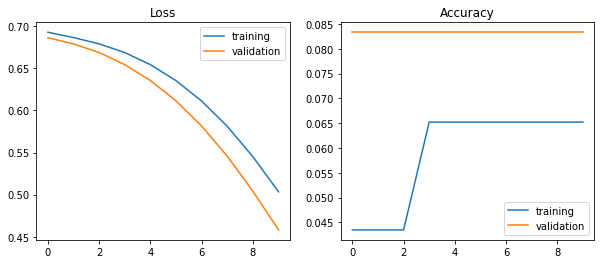

In [99]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [100]:
train_scores = model.evaluate(x_train_t_tfidf, y_train)

2/2 [==============================] - 0s 35ms/step - loss: 0.4574 - accuracy: 0.0517


In [101]:
train_scores

[0.45735493302345276, 0.0517241396009922]

In [102]:
test_scores = model.evaluate(x_test_t_tfidf, y_test)

1/1 [==============================] - 0s 90ms/step - loss: 0.4562 - accuracy: 0.0769


In [103]:
test_scores

[0.4562419354915619, 0.07692307978868484]

In [126]:
maxlen = max([x_train_l_tfidf[i].data.shape[0] for i in range(x_train_l_tfidf.shape[0])])
maxlen = 500

In [105]:
x_train_l_tfidf = sequence.pad_sequences([x.data for x in x_train_l_tfidf], maxlen=maxlen, dtype='float16')
x_test_l_tfidf = sequence.pad_sequences([x.data for x in x_test_l_tfidf], maxlen=maxlen, dtype='float16')

In [127]:
vocabulary_size = len(count_vectorizer_l.vocabulary_)

In [138]:
model = Sequential([Embedding(vocabulary_size, 128, input_length=maxlen), 
                    Conv1D(48, 10, activation='sigmoid'), 
                    MaxPool1D(pool_size=48),
                    # Conv1D(48, 7, activation='sigmoid'), 
                    # MaxPool1D(pool_size=5),
                    GlobalMaxPool1D(),
                    Flatten(),
                    Dense(14, activation='softmax')
                   ]) 

In [139]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 128)          460672    
                                                                 
 conv1d_12 (Conv1D)          (None, 491, 48)           61488     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 10, 48)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_9 (Glo  (None, 48)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_9 (Flatten)         (None, 48)                0         
                                                                 
 dense_14 (Dense)            (None, 14)               

In [140]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [141]:
history = model.fit(x_train_l_tfidf, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7874 - accuracy: 0.1087 - val_loss: 0.7871 - val_accuracy: 0.0833
Epoch 2/10
1/1 [==============================] - 0s 309ms/step - loss: 0.7857 - accuracy: 0.1087 - val_loss: 0.7854 - val_accuracy: 0.0833
Epoch 3/10
1/1 [==============================] - 0s 319ms/step - loss: 0.7839 - accuracy: 0.1087 - val_loss: 0.7836 - val_accuracy: 0.0833
Epoch 4/10
1/1 [==============================] - 0s 317ms/step - loss: 0.7822 - accuracy: 0.1087 - val_loss: 0.7819 - val_accuracy: 0.0833
Epoch 5/10
1/1 [==============================] - 0s 339ms/step - loss: 0.7804 - accuracy: 0.1087 - val_loss: 0.7801 - val_accuracy: 0.0833
Epoch 6/10
1/1 [==============================] - 0s 369ms/step - loss: 0.7787 - accuracy: 0.1087 - val_loss: 0.7784 - val_accuracy: 0.0833
Epoch 7/10
1/1 [==============================] - 0s 341ms/step - loss: 0.7769 - accuracy: 0.1087 - val_loss: 0.7767 - val_accuracy: 0.0833
Epoch 8/10
1/1 [=======

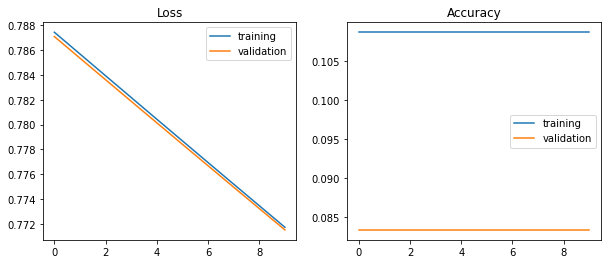

In [142]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='training')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation')
plt.legend(loc='best')

plt.show()

In [143]:
train_scores = model.evaluate(x_train_l_tfidf, y_train)

2/2 [==============================] - 0s 48ms/step - loss: 0.7703 - accuracy: 0.1034


In [144]:
train_scores

[0.7702946066856384, 0.1034482792019844]

In [145]:
test_scores = model.evaluate(x_test_l_tfidf, y_test)

1/1 [==============================] - 0s 83ms/step - loss: 0.7726 - accuracy: 0.0769


In [146]:
test_scores

[0.7725589275360107, 0.07692307978868484]